In [1]:
import sidrapy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:

sidra_producao = sidrapy.get_table(
    table_code = '7524', # T/  Tabela:  	7524 - 	Número de informantes, Número de galinhas poedeiras e Quantidade de ovos produzidos, no mês e no trimestre
    period = 'all', # P/  Trimestre(151):
    variable = '29', # V/  Variável(4): 29  Quantidade de ovos produzidos (Mil dúzias) - casas decimais: padrão = 0, máximo = 0
    classifications = {'1835' : '72207'} , # C1835  Finalidade da produção(3):72208  Total 72207  Consumo 72206  Incubação
    territorial_level = '1', # N = 1 = Brasil # N = 3 = UF (26)
    ibge_territorial_code = 'all' #Para consultar cofigo UF:https://apisidra.ibge.gov.br/LisUnitTabAPI.aspx?c=7524&n=3&i=P
)
    
#Convertendo para DataFrame do pandas
df = pd.DataFrame(sidra_producao)

# Exibir as primeiras linhas do DataFrame
df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Finalidade da produção (Código),Finalidade da produção,Referência temporal (Código),Referência temporal
1,1,Brasil,23,Mil dúzias,-,1,Brasil,198701,1º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
2,1,Brasil,23,Mil dúzias,-,1,Brasil,198702,2º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
3,1,Brasil,23,Mil dúzias,-,1,Brasil,198703,3º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
4,1,Brasil,23,Mil dúzias,-,1,Brasil,198704,4º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre


# Tratando os dados

In [3]:
#observação e tratamento
print(df.columns)
print(df.iloc[0])
df.dtypes

Index(['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N',
       'D4C', 'D4N', 'D5C', 'D5N'],
      dtype='object')
NC          Nível Territorial (Código)
NN                   Nível Territorial
MC          Unidade de Medida (Código)
MN                   Unidade de Medida
V                                Valor
D1C                    Brasil (Código)
D1N                             Brasil
D2C                 Trimestre (Código)
D2N                          Trimestre
D3C                  Variável (Código)
D3N                           Variável
D4C    Finalidade da produção (Código)
D4N             Finalidade da produção
D5C       Referência temporal (Código)
D5N                Referência temporal
Name: 0, dtype: object


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
D4C    object
D4N    object
D5C    object
D5N    object
dtype: object

In [12]:
#tratamento dos dados

df = pd.DataFrame(sidra_producao)

# Usando a primeira linha como header e removendo a linha antiga
df.columns = df.iloc[0]  # Define os novos nomes das colunas
df = df[1:].reset_index(drop=True)  # Remove a linha antiga

# Renomeando as colunas principais para facilitar a manipulação
df = df.rename(columns={
    'Nível Territorial (Código)': 'Codigo_Territorial',
    'Nível Territorial': 'Nivel_Territorial',
    'Unidade de Medida': 'Unidade_Medida',
    'Valor': 'Valor',
    'Brasil (Código)': 'Codigo_Brasil',
    'Brasil': 'Brasil',
    'Trimestre (Código)': 'Codigo_Trimestre',
    'Trimestre': 'Trimestre',
    'Variável (Código)': 'Codigo_Variavel',
    'Variável': 'Variavel',
    'Finalidade da produção (Código)': 'Codigo_Finalidade',
    'Finalidade da produção': 'Finalidade',
    'Referência temporal (Código)': 'Codigo_Temporal',
    'Referência temporal': 'Referencia_Temporal'
})

# Convertendo a coluna 'Valor' para numérico, substituindo '-' por NaN
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Exibir DataFrame tratado
print(df.head())
print(df.dtypes)


0 Codigo_Territorial Nivel_Territorial Unidade de Medida (Código)  \
0                  1            Brasil                         23   
1                  1            Brasil                         23   
2                  1            Brasil                         23   
3                  1            Brasil                         23   
4                  1            Brasil                         23   

0 Unidade_Medida  Valor Codigo_Brasil  Brasil Codigo_Trimestre  \
0     Mil dúzias    NaN             1  Brasil           198701   
1     Mil dúzias    NaN             1  Brasil           198702   
2     Mil dúzias    NaN             1  Brasil           198703   
3     Mil dúzias    NaN             1  Brasil           198704   
4     Mil dúzias    NaN             1  Brasil           198801   

0          Trimestre Codigo_Variavel                       Variavel  \
0  1º trimestre 1987              29  Quantidade de ovos produzidos   
1  2º trimestre 1987              29  Quantida

In [5]:
df

,Codigo_Territorial,Nivel_Territorial,Unidade de Medida (Código),Unidade_Medida,Valor,Codigo_Brasil,Brasil,Codigo_Trimestre,Trimestre,Codigo_Variavel,Variavel,Codigo_Finalidade,Finalidade,Codigo_Temporal,Referencia_Temporal
0,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198701,1º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
1,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198702,2º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
2,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198703,3º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
3,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198704,4º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
4,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198801,1º trimestre 1988,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,Brasil,23,Mil dúzias,884299.0,1,Brasil,202303,3º trimestre 2023,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
147,1,Brasil,23,Mil dúzias,868574.0,1,Brasil,202304,4º trimestre 2023,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
148,1,Brasil,23,Mil dúzias,893957.0,1,Brasil,202401,1º trimestre 2024,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre
149,1,Brasil,23,Mil dúzias,957469.0,1,Brasil,202402,2º trimestre 2024,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre


In [19]:
# Renomear colunas para um formato mais simples
df = df.rename(columns={
    'Codigo_Territorial': 'Codigo_Territorio',
    'Nivel_Territorial': 'Nivel_Territorio',
    'Unidade de Medida (Código)': 'Codigo_Unidade',
    'Unidade_Medida': 'Unidade',
    'Valor': 'Quantidade_Ovos',
    'Codigo_Brasil': 'Codigo_Brasil',
    'Brasil': 'Brasil',
    'Codigo_Trimestre': 'AnoTrimestre',
    'Trimestre': 'Trimestre',
    'Codigo_Variavel': 'Codigo_Variavel',
    'Variavel': 'Variavel',
    'Codigo_Finalidade': 'Codigo_Finalidade',
    'Finalidade': 'Finalidade',
    'Codigo_Temporal': 'Codigo_Temporal',
    'Referencia_Temporal': 'Referencia_Temporal'
})

df['Ano'] = df['AnoTrimestre'].astype(str).str[:4].astype(int)
df['Trimestre_Num'] = df['AnoTrimestre'].astype(str).str[-1].astype(int)

df['Ano'] = df['Ano'].astype(int)
df['Trimestre_Num'] = df['Trimestre_Num'].astype(int)


# Criar uma coluna de data com um formato padrão
df['Data_Trimestre'] = df.apply(
    lambda row: pd.to_datetime(f"{row['Ano']}-01-01") + pd.DateOffset(months=(row['Trimestre_Num'] - 1) * 3),
    axis=1
)


# Converter a coluna Quantidade_Ovos para numérico, tratando possíveis valores vazios
df['Quantidade_Ovos']  = pd.to_numeric(df['Quantidade_Ovos'],errors = 'coerce')

#Exibir os resultados após a limpeza
print(df.info())
print(df.head())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Codigo_Territorio    151 non-null    object        
 1   Nivel_Territorio     151 non-null    object        
 2   Codigo_Unidade       151 non-null    object        
 3   Unidade              151 non-null    object        
 4   Quantidade_Ovos      51 non-null     float64       
 5   Codigo_Brasil        151 non-null    object        
 6   Brasil               151 non-null    object        
 7   AnoTrimestre         151 non-null    object        
 8   Trimestre            151 non-null    object        
 9   Codigo_Variavel      151 non-null    object        
 10  Variavel             151 non-null    object        
 11  Codigo_Finalidade    151 non-null    object        
 12  Finalidade           151 non-null    object        
 13  Codigo_Temporal      151 non-null  

In [20]:
df

,Codigo_Territorio,Nivel_Territorio,Codigo_Unidade,Unidade,Quantidade_Ovos,Codigo_Brasil,Brasil,AnoTrimestre,Trimestre,Codigo_Variavel,Variavel,Codigo_Finalidade,Finalidade,Codigo_Temporal,Referencia_Temporal,Ano,Trimestre_Num,Data_Trimestre
0,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198701,1º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,1987,1,1987-01-01
1,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198702,2º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,1987,2,1987-04-01
2,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198703,3º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,1987,3,1987-07-01
3,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198704,4º trimestre 1987,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,1987,4,1987-10-01
4,1,Brasil,23,Mil dúzias,NaN,1,Brasil,198801,1º trimestre 1988,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,1988,1,1988-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,Brasil,23,Mil dúzias,884299.0,1,Brasil,202303,3º trimestre 2023,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,2023,3,2023-07-01
147,1,Brasil,23,Mil dúzias,868574.0,1,Brasil,202304,4º trimestre 2023,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,2023,4,2023-10-01
148,1,Brasil,23,Mil dúzias,893957.0,1,Brasil,202401,1º trimestre 2024,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,2024,1,2024-01-01
149,1,Brasil,23,Mil dúzias,957469.0,1,Brasil,202402,2º trimestre 2024,29,Quantidade de ovos produzidos,72207,Consumo,115236,Total do trimestre,2024,2,2024-04-01


# É observado que os dados de produção de ovos sõ estão disponíveis a  partir de 2012, então precisamos tratar os dados

In [21]:
df.head(), df.dtypes
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Codigo_Territorio    151 non-null    object        
 1   Nivel_Territorio     151 non-null    object        
 2   Codigo_Unidade       151 non-null    object        
 3   Unidade              151 non-null    object        
 4   Quantidade_Ovos      51 non-null     float64       
 5   Codigo_Brasil        151 non-null    object        
 6   Brasil               151 non-null    object        
 7   AnoTrimestre         151 non-null    object        
 8   Trimestre            151 non-null    object        
 9   Codigo_Variavel      151 non-null    object        
 10  Variavel             151 non-null    object        
 11  Codigo_Finalidade    151 non-null    object        
 12  Finalidade           151 non-null    object        
 13  Codigo_Temporal      151 non-null  

0
Codigo_Territorio        0
Nivel_Territorio         0
Codigo_Unidade           0
Unidade                  0
Quantidade_Ovos        100
Codigo_Brasil            0
Brasil                   0
AnoTrimestre             0
Trimestre                0
Codigo_Variavel          0
Variavel                 0
Codigo_Finalidade        0
Finalidade               0
Codigo_Temporal          0
Referencia_Temporal      0
Ano                      0
Trimestre_Num            0
Data_Trimestre           0
dtype: int64

In [22]:
#Quantidade de ovos ausentes em 100 linhas 


# Verificando a distribuição dos valores ausentes por ano
df['Ano'] = df['Data_Trimestre'].dt.year
print(df.groupby('Ano')['Quantidade_Ovos'].apply(lambda x: x.isnull().sum()))

#Verificando os periodos com os valores ausentes, assim posso excluir esses periodos, já quee eles nao irão trazer os dados necessários
# Filtrando os registros com valores ausentes
df_ausentes = df[df['Quantidade_Ovos'].isnull()]
print(df_ausentes[['Ano', 'Trimestre_Num', 'Quantidade_Ovos']])

Ano
1987    4
1988    4
1989    4
1990    4
1991    4
1992    4
1993    4
1994    4
1995    4
1996    4
1997    4
1998    4
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    4
2010    4
2011    4
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
Name: Quantidade_Ovos, dtype: int64
0    Ano  Trimestre_Num  Quantidade_Ovos
0   1987              1              NaN
1   1987              2              NaN
2   1987              3              NaN
3   1987              4              NaN
4   1988              1              NaN
..   ...            ...              ...
95  2010              4              NaN
96  2011              1              NaN
97  2011              2              NaN
98  2011              3              NaN
99  2011              4              NaN

[100 rows x 3 columns]


In [23]:
# Os dados são validos somente a partir de 2012

df_filtrado = df[df['Ano'] >= 2012].copy()
# Verificando o resultado
print(df_filtrado.head())
print(df_filtrado.tail())

0   Codigo_Territorio Nivel_Territorio Codigo_Unidade     Unidade  \
100                 1           Brasil             23  Mil dúzias   
101                 1           Brasil             23  Mil dúzias   
102                 1           Brasil             23  Mil dúzias   
103                 1           Brasil             23  Mil dúzias   
104                 1           Brasil             23  Mil dúzias   

0    Quantidade_Ovos Codigo_Brasil  Brasil AnoTrimestre          Trimestre  \
100         520316.0             1  Brasil       201201  1º trimestre 2012   
101         522146.0             1  Brasil       201202  2º trimestre 2012   
102         527680.0             1  Brasil       201203  3º trimestre 2012   
103         515538.0             1  Brasil       201204  4º trimestre 2012   
104         518881.0             1  Brasil       201301  1º trimestre 2013   

0   Codigo_Variavel                       Variavel Codigo_Finalidade  \
100              29  Quantidade de ovos prod

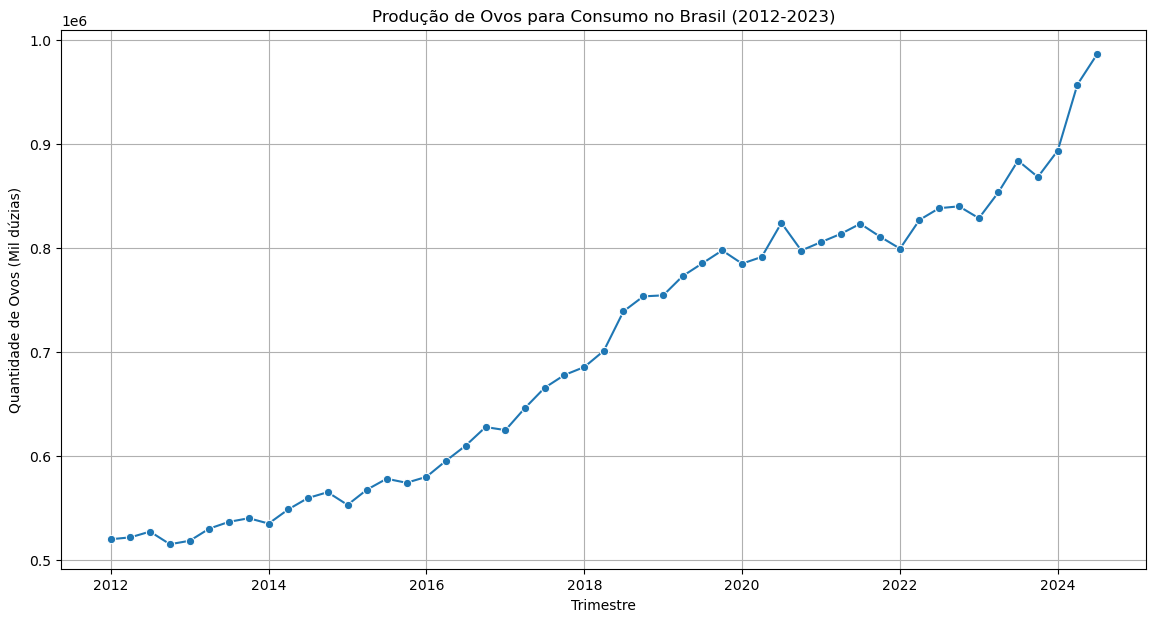

In [30]:
#Série Temporal de produção de ovos 
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado, x='Data_Trimestre', y='Quantidade_Ovos', marker='o')
plt.title('Produção de Ovos para Consumo no Brasil (2012-2023)')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Ovos (Mil dúzias)')
plt.grid(True)
fig = plt.gcf()
fig.savefig('Serie_Temporal.png',format='png')
plt.show()


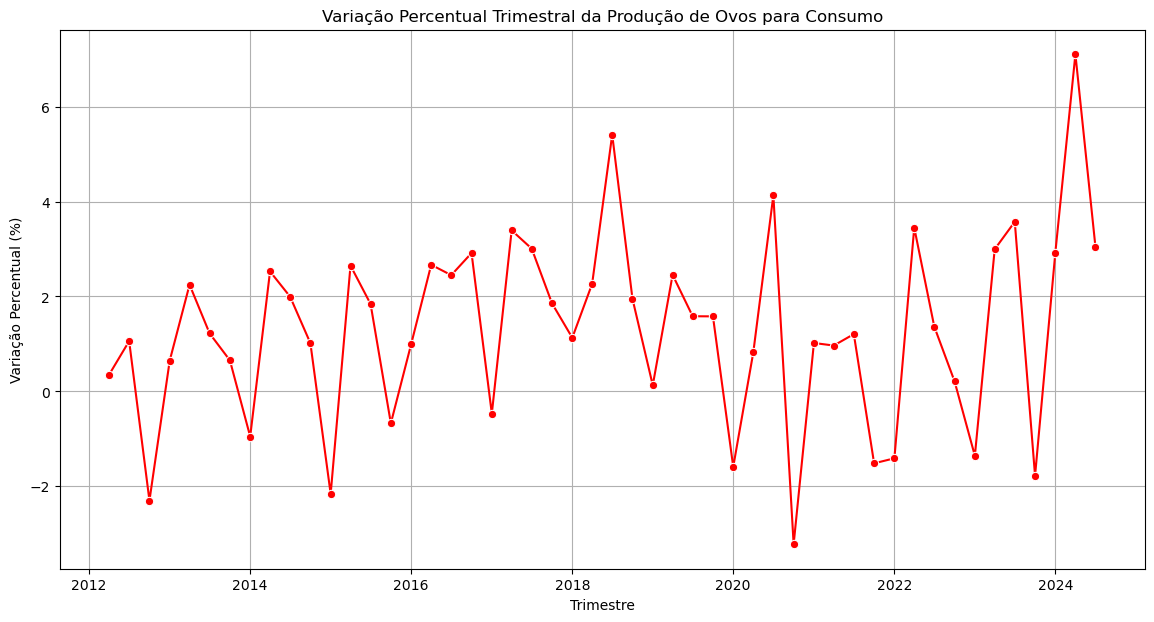

In [31]:
#Variação Percentual Trimestral:
df_filtrado['Variação_Percentual'] = df_filtrado['Quantidade_Ovos'].pct_change() * 100

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado, x='Data_Trimestre', y='Variação_Percentual', marker='o', color='red')
plt.title('Variação Percentual Trimestral da Produção de Ovos para Consumo')
plt.xlabel('Trimestre')
plt.ylabel('Variação Percentual (%)')
plt.grid(True)
fig = plt.gcf()
fig.savefig('Variacao_Percentual.png',format='png')
plt.show()

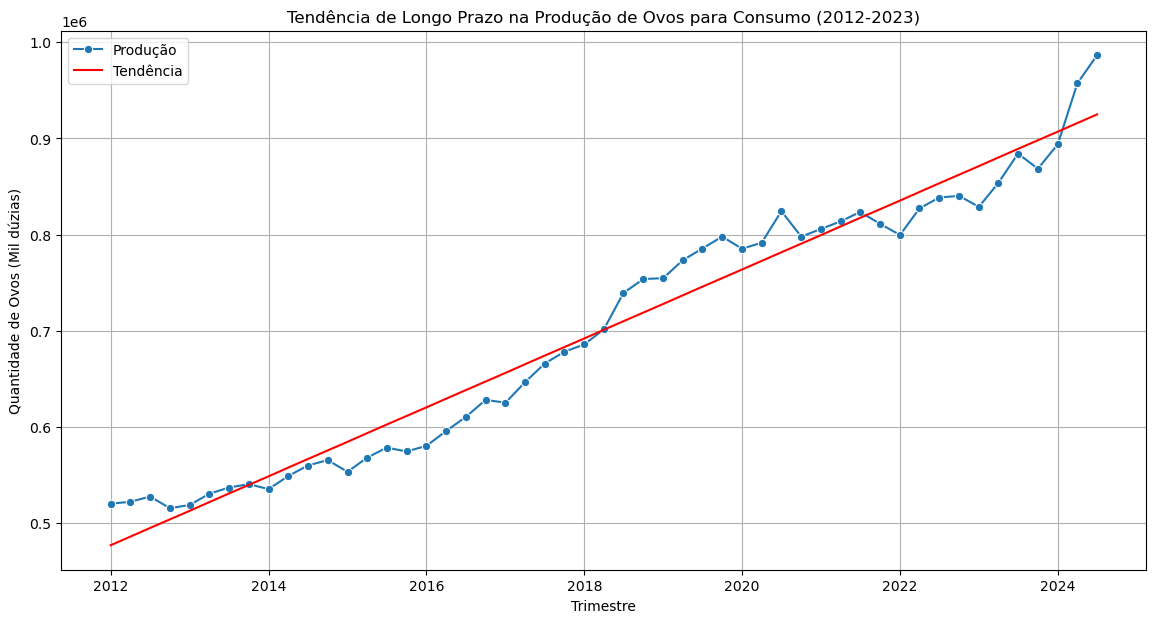

In [32]:
#Tendencia

from sklearn.linear_model import LinearRegression

# Criando uma coluna numérica para o tempo
df_filtrado['Trimestre_Index'] = range(len(df_filtrado))

# Ajustando um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(df_filtrado[['Trimestre_Index']], df_filtrado['Quantidade_Ovos'])
df_filtrado['Tendência'] = modelo.predict(df_filtrado[['Trimestre_Index']])

# Plotando a tendência
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado, x='Data_Trimestre', y='Quantidade_Ovos', marker='o', label='Produção')
sns.lineplot(data=df_filtrado, x='Data_Trimestre', y='Tendência', color='red', label='Tendência')
plt.title('Tendência de Longo Prazo na Produção de Ovos para Consumo (2012-2023)')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Ovos (Mil dúzias)')
plt.legend()
plt.grid(True)
fig = plt.gcf()
fig.savefig('Regressao_Linear.png',format='png')
plt.show()